# Single-group Segregation Indices

In [1]:
%load_ext watermark
%watermark -a 'eli knaap' -v -d -u -p segregation,geopandas,libpysal,pandana

Author: eli knaap

Last updated: 2021-06-06

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.23.1

segregation: 2.0.0
geopandas  : 0.9.0
libpysal   : 4.4.0
pandana    : not installed



Single-group indices are calculated using the `singlegroup` module

### Data Prep

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.examples import load_example

In [3]:
# read in sacramento data from libpysal and reproject into an appropriate CRS
sacramento = gpd.read_file(load_example("Sacramento1").get_path("sacramentot2.shp"))
sacramento = sacramento.to_crs(sacramento.estimate_utm_crs())

In [4]:
sacramento.head()

FIPS         MSA  TOT_POP  POP_16  POP_65  WHITE  BLACK  ASIAN  \
0  06061022001  Sacramento     5501    1077     518   4961     29     82   
1  06061020106  Sacramento     2072     396     109   1603      0     28   
2  06061020107  Sacramento     3633     911     126   1624      9      0   
3  06061020105  Sacramento     1683     281     154   1564      0     55   
4  06061020200  Sacramento     5794    1278     830   5185     17     13   

   HISP  MULTI_RA  ...  EMP_FEM  OCC_MAN  OCC_OFF1  OCC_INFO  HH_INC  POV_POP  \
0   336        31  ...     1187      117     663.0        42   52941     5461   
1   391        41  ...      522       38     229.0        19   51958     2052   
2  1918        41  ...      698       86     197.0         0   32992     3604   
3    60         4  ...      519        5     256.0         6   54556     1683   
4   251       229  ...     1260      155     506.0        59   50815     5771   

   POV_TOT  HSG_VAL  POLYID                                           geometry  
0      470   225900       1  POLYGON ((740409.853 4338451.728, 740199.864 4...  
1      160   249300       2  POLYGON ((753400.378 4347151.080, 753395.816 4...  
2      668   175900       3  POLYGON ((758318.262 4352123.456, 758319.774 4...  
3      116   302300       4  POLYGON ((750839.595 4342678.807, 750805.840 4...  
4      342   167300       5  POLYGON ((670062.020 4311030.409, 670133.819 4...  

[5 rows x 31 columns]

In [5]:
sacramento.plot('BLACK')

<AxesSubplot:>

## Aspatial Segregation Indices

To compute an aspatial segregation index, pass a dataframe, a group population variable, and total population variable to the index's class

In [6]:
from segregation.singlegroup import Dissim

In [7]:
dissim = Dissim(sacramento, group_pop_var='BLACK', 
                total_pop_var='TOT_POP')

The `statistic` attribute holds the value of the segregation index, and the `data` attribute holds the data used to calculate the index

In [8]:
dissim.statistic

0.4883394024705785

In [9]:
dissim.data.head()

BLACK  TOT_POP                                           geometry
0     29     5501  POLYGON ((740409.853 4338451.728, 740199.864 4...
1      0     2072  POLYGON ((753400.378 4347151.080, 753395.816 4...
2      9     3633  POLYGON ((758318.262 4352123.456, 758319.774 4...
3      0     1683  POLYGON ((750839.595 4342678.807, 750805.840 4...
4     17     5794  POLYGON ((670062.020 4311030.409, 670133.819 4...

### Depreciation for 2.0

In [10]:
from segregation.aspatial import Dissim 

In [11]:
res = Dissim(sacramento, group_pop_var='BLACK', 
                total_pop_var='TOT_POP')

<ipython-input-11-33d3b5bf446c>:1: DeprecatedWarning: Dissim is deprecated as of 2.0 and will be removed in 2.2. singlegroup.Dissim or multigroup.MultiDissim
  res = Dissim(sacramento, group_pop_var='BLACK',


In [12]:
res.statistic == dissim.statistic

True

## Spatial Segregation Indices

For calculating spatial segregation indices, the package implements two classes of indices: spatially-explicit and spatially-implicit. 

Spatially-explicit indices are those for which space was a formal consideration in the index's original formulation, whereas spatially-implicit indices are developed using the logic of [Reardon and O'Sulivan](http://doi.wiley.com/10.1111/j.0081-1750.2004.00150.x). 

For the latter,(otherwise called *generalized* spatial segregation indices) the package can incorporate spatial relationships represented by either a [`libpysal.W`](https://pysal.org/libpysal/api.html) weights object or a [`pandana.Network`](http://udst.github.io/pandana/network.html) network object, which means generalized spatial segregation indices can be computed according to many different spatial relationships which could include contiguity, distance, or network connectivity. This flexibility is particularly useful for specifying appropriate "neighborhood" definitions for different types of input data (which could be, e.g. housing units, census tracts, or counties)

For spatially-explicit indices, they can be called like any other, though some may have additional arguments:

In [13]:
from segregation.singlegroup import AbsoluteCentralization, Gini

In [14]:
cent = AbsoluteCentralization(sacramento, group_pop_var='BLACK', 
                              total_pop_var='TOT_POP')

In [15]:
cent.statistic

0.8491771822066525

### Euclidian distance based measures

For generalized spatial indices, a `distance` parameter can be passed to the index of choice. Under the hood, the input data will be passed through a kernel function with the distance parameter as the kernel bandwidth.

(note in this case because the CRS of the sacramento dataframe is UTM, the units are in meters)

In [16]:
# aspatial gini index
aspatial_gini = Gini(sacramento, group_pop_var='BLACK', 
                     total_pop_var='TOT_POP')

In [17]:
# generalized spatial gini index
gen_spatialgini = Gini(sacramento, group_pop_var='BLACK', 
                       total_pop_var='TOT_POP', distance=2000)

In [18]:
gen_spatialgini.statistic

0.5368102768280613

In [19]:
aspatial_gini.statistic

0.6361755332635235

Examining the `data` attribute of the fitted index shows how the input data are transformed

In [20]:
# kernelized data
gen_spatialgini.data.plot('BLACK')

<AxesSubplot:>

<AxesSubplot:>

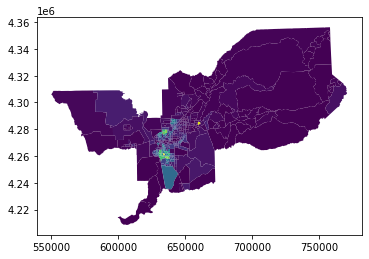

In [21]:
# original data
sacramento.plot('BLACK')

## Deprecation

In [22]:
from segregation.aspatial import  GiniSeg

In [23]:
GiniSeg(sacramento, group_pop_var='BLACK', 
                     total_pop_var='TOT_POP')

<ipython-input-23-212071080814>:1: DeprecatedWarning: GiniSeg is deprecated as of 2.0 and will be removed in 2.2. singlegroup.GiniSeg or multigroup.GiniSeg
  GiniSeg(sacramento, group_pop_var='BLACK',


In [24]:
dep_res = GiniSeg(sacramento, group_pop_var='BLACK', 
                     total_pop_var='TOT_POP')

<ipython-input-24-d66bdb35a872>:1: DeprecatedWarning: GiniSeg is deprecated as of 2.0 and will be removed in 2.2. singlegroup.GiniSeg or multigroup.GiniSeg
  dep_res = GiniSeg(sacramento, group_pop_var='BLACK',


In [25]:
dep_res.statistic == aspatial_gini.statistic

array([ True])